In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install vitaldb
import vitaldb
!pip install neurokit2
import neurokit2 as nk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 565.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.2/689.2 kB 3.9 MB/s eta 0:00:00


In [ ]:
df_cases = pd.read_csv("https://api.vitaldb.net/cases")  # clinical information
df_trks = pd.read_csv("https://api.vitaldb.net/trks")  # track list

In [ ]:
df_cases

In [ ]:
# Con este filtro se obtienen los id de los pacientes que cumplen con las condiciones mencionadas

caseids = list(
    set(df_trks.loc[df_trks['tname'] == 'SNUADC/ECG_II','caseid']) &
    set(df_trks.loc[df_trks['tname'] == 'BIS/BIS','caseid']) &
    set(df_cases.loc[df_cases['department'] == 'General surgery','caseid']) &
    set(df_cases.loc[df_cases['ane_type'] == 'General','caseid']) &
    set(df_cases.loc[df_cases['position'] == 'Supine','caseid']) &
    set(df_cases.loc[df_cases['approach'] == 'Open','caseid']) &
    set(df_cases.loc[df_cases['optype'] == 'Colorectal','caseid']) &
    #set(df_cases.loc[(df_cases['caseend']-df_cases['aneend'])>=30,'caseid']) &
    set(df_cases.loc[(df_cases['age']>19) & (df_cases['age']<71) ,'caseid'])&
    #set(df_cases.loc[(df_cases['caseend']>=3600) & (df_cases['caseend']<=4500) ,'caseid']) &
    set(df_cases.loc[df_cases['weight']<=80,'caseid'])
)
print(f'{len(caseids)} cases found')
print(caseids)
#set(df_cases.loc[(df_cases['aneend'] <=14400),'caseid'])&

298 cases found
[2565, 2054, 4614, 5640, 5130, 2571, 6156, 4110, 3086, 528, 4625, 4626, 1550, 4119, 6173, 2078, 1567, 2084, 5157, 2598, 4646, 5158, 5161, 3621, 555, 556, 5672, 1582, 2607, 5170, 3123, 3634, 2102, 2614, 569, 3641, 4668, 4670, 4159, 4160, 1598, 6210, 3651, 3140, 1606, 71, 4680, 4681, 588, 4685, 2126, 4686, 3661, 6226, 4691, 5714, 5206, 5720, 2649, 6236, 4701, 3678, 1634, 2659, 612, 613, 3682, 3176, 3178, 2669, 5229, 3183, 1650, 3704, 6265, 1659, 1150, 1153, 4738, 3201, 647, 5115, 5767, 5770, 651, 653, 5776, 5782, 1175, 3224, 6300, 6137, 159, 5279, 5792, 4772, 1189, 4776, 6315, 173, 4269, 687, 3245, 1709, 3251, 3764, 2229, 6325, 4279, 695, 5813, 1721, 2235, 3770, 6113, 3264, 5824, 2242, 6338, 2754, 3778, 5320, 5833, 3788, 718, 2255, 1744, 2770, 1235, 2265, 3801, 2779, 5852, 735, 224, 2784, 1247, 3809, 3301, 1255, 6377, 1258, 3306, 5868, 4845, 5874, 2291, 2293, 2805, 4855, 1270, 3830, 3324, 4349, 3326, 1788, 5885, 5378, 4867, 5893, 2825, 3343, 4369, 4370, 5394, 1813, 4376, 

In [ ]:
# %% Reading all cases
trks=[]
#len(caseids)+1
for i in range(100,104,1):
  caseId=caseids[i]
  vals_s = vitaldb.load_case(caseId, ['SNUADC/ECG_II'], 1/500) # es un numpy
  vals_s2 = vitaldb.load_case(caseId, ['BIS/BIS'], 1) # es un numpy
  ecg = vals_s[:,0]
  Bis = vals_s2[:,0]

  trks.append({
    "ECG":ecg,
     "BIS":Bis,
     "ID_CASE":caseId
})
df=pd.DataFrame(trks)
df.ID_CASE.tolist()

[4269, 687, 3245, 1709]

###PRUEBA

In [ ]:
import numpy as np
import pandas as pd
a=[1,2,3,4,5,6,7,8,9,10]
b=np.arange(0.002,0.02+0.002,0.002)
a=np.asarray(a)

prueba={
    'tiempo':b,
    'muestras':a
}

frame=pd.DataFrame(prueba)

In [ ]:
frame

In [ ]:
frame['muestras'][5:8]

5    6
6    7
7    8
Name: muestras, dtype: int64

In [ ]:
#para saber el tiempo

muestra_start=5
muestra_end=8
tiem_start=(muestra_start+1)*0.002
tiem_end=(muestra_end)*0.002
print(tiem_end)
print(a[muestra_start:muestra_end])

0.016
[6 7 8]


Inicio anestesia, minuto: -17
Final anestesia, minuto: 92
Pesona_despierta,termina la grabacion, minuto: 91
2430000
2730000


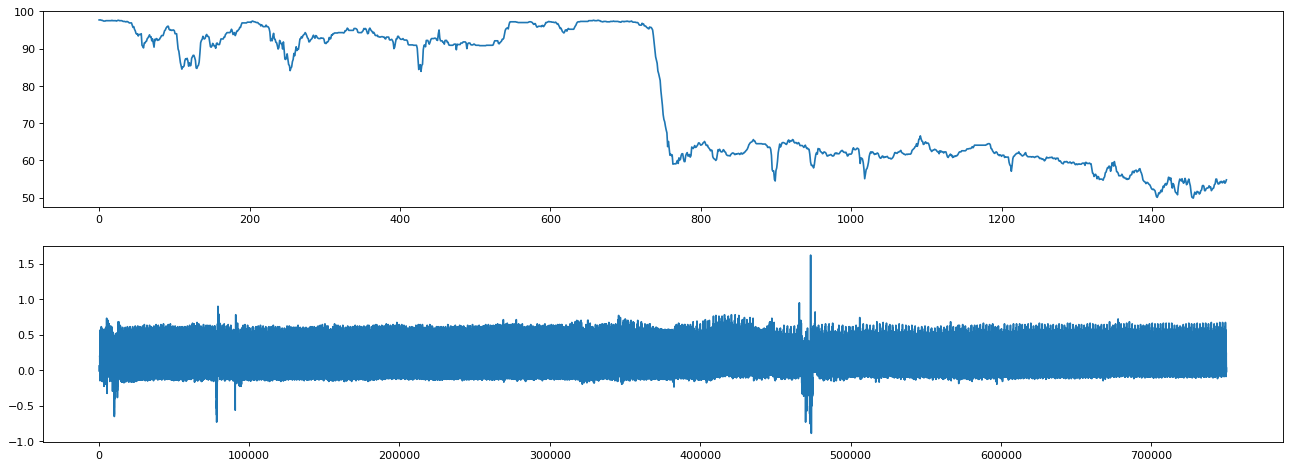

In [ ]:
i=3
a=df_cases.loc[df_cases['caseid']==caseids[i]]
inicio_anes=int(((a['anestart']))/60)
fin_ans=int((a['aneend'])/60)
fin_case=int((a['caseend'])/60)

print(f'Inicio anestesia, minuto: {inicio_anes}')
print(f'Final anestesia, minuto: {fin_ans}')
print(f'Pesona_despierta,termina la grabacion, minuto: {fin_case}')
a=((fin_case-10)*60*500)
print(a)
b=fin_case*60*500
print(b)
plt.figure(figsize=(20,7),dpi=80)
plt.subplot(2,1,1)
plt.plot(df['BIS'][i][0:1500])
plt.subplot(2,1,2)
plt.plot(df['ECG'][i][0:750000])  #750.000

In [ ]:
def signall(Fsc,t1,t2,df):
  trks_knn=[]
  dfc= pd.DataFrame()
  time_C=np.arange(t1,t2, 1/Fsc)
  dfc["tiempo"] = time_C
  for i in range(0,len(df),1):
    ecg=pd.DataFrame(df.iloc[i][0])
    ecg=ecg[(t1*Fsc)-1:(t2*Fsc)-1]
    ecg2=ecg.to_numpy().transpose().tolist()
    ecg2=ecg2[0]
    # ecg=ecg.transpose()
    # bis=bis.transpose()
    c=(df.iloc[i][2]).tolist()
    dfc[f"ecg_{c}"] = ecg2
  return dfc

In [ ]:
dfc=signall(500,100,1500,df)
ecg_filled=dfc.fillna(method='ffill')
ecg_filled.info()

<ipython-input-5-27a8ee72f3c1>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ecg=pd.DataFrame(df.iloc[i][0])
<ipython-input-5-27a8ee72f3c1>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  c=(df.iloc[i][2]).tolist()
<ipython-input-5-27a8ee72f3c1>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ecg=pd.DataFrame(df.iloc[i][0])
<ipython-input-5-27a8ee72f3c1>:13: FutureWarning: Series.__getitem__ treating keys as positions is depre

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   tiempo    700000 non-null  float64
 1   ecg_4269  700000 non-null  float64
 2   ecg_687   700000 non-null  float64
 3   ecg_3245  700000 non-null  float64
 4   ecg_1709  700000 non-null  float64
dtypes: float64(5)
memory usage: 26.7 MB


In [ ]:
ecg_filled

,tiempo,ecg_4269,ecg_687,ecg_3245,ecg_1709
0,100.000,-0.028849,-0.068348,-0.038724,0.188391
1,100.002,-0.028849,-0.068348,-0.018975,0.198266
2,100.004,-0.028849,-0.078222,-0.028849,0.198266
3,100.006,-0.038724,-0.078222,-0.009100,0.198266
4,100.008,-0.028849,-0.078222,-0.009100,0.198266
...,...,...,...,...,...
699995,1499.990,-0.058473,0.060022,0.050147,0.010649
699996,1499.992,-0.058473,0.050147,0.050147,0.010649
699997,1499.994,-0.058473,0.050147,0.040273,0.020523
699998,1499.996,-0.058473,0.040273,0.040273,0.020523


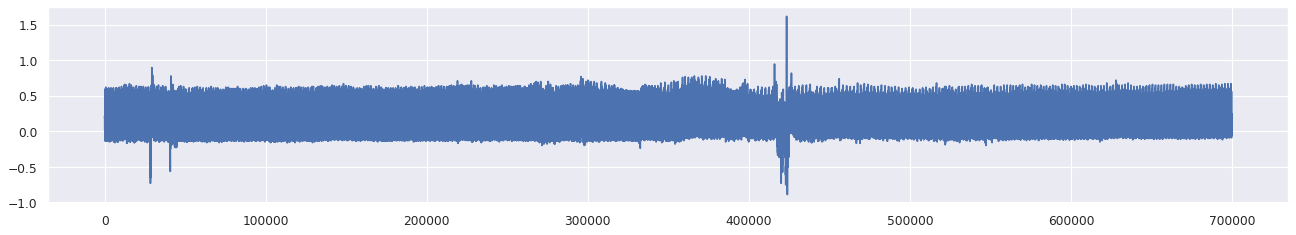

In [ ]:
plt.figure(figsize=(20,7),dpi=80)
plt.subplot(2,1,1)
plt.plot(ecg_filled.ecg_1709)


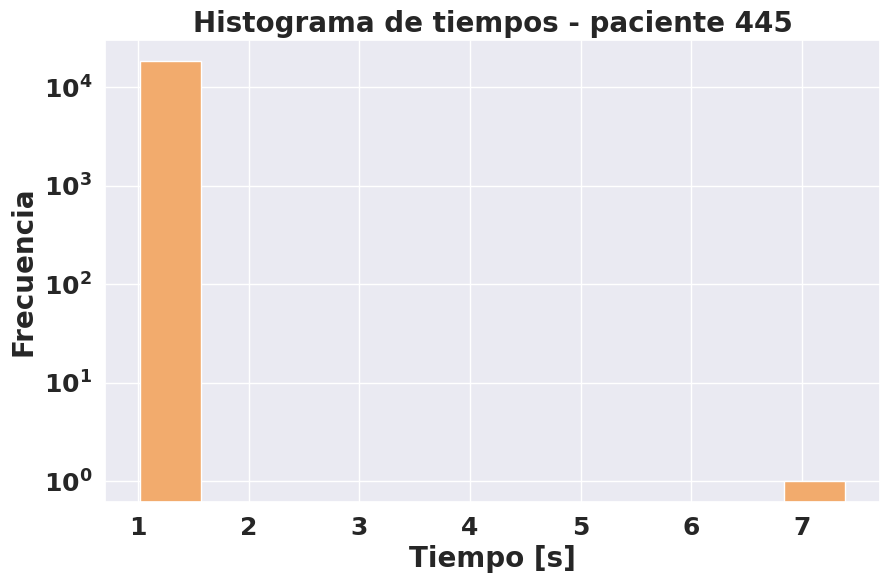

In [ ]:
id=445 #345,2903
td=df_trks.loc[df_trks['tname']=='BIS/BIS']
#b=(td.loc[td['caseid']==id]).tid
link='https://api.vitaldb.net/'
fila_deseada = td.loc[td['caseid'] == id].index.item()
bis_1709=pd.read_csv(link+td['tid'][fila_deseada])
plt.hist(((bis_1709['Time']).diff()), color='#F2AB6D', rwidth=0.85)
plt.xlabel("Tiempo [s]",fontsize=20,fontweight='bold')
plt.ylabel("Frecuencia",fontsize=20,fontweight='bold')
plt.title(f"Histograma de tiempos - paciente {id}",fontsize=20,fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=18, width=2, length=6, direction="out")
plt.xticks(fontweight='bold')  # Establecer la negrita para los nÃºmeros en el eje x
plt.yticks(fontweight='bold')
#plt.xlim(0,)
plt.yscale('log')
plt.show()

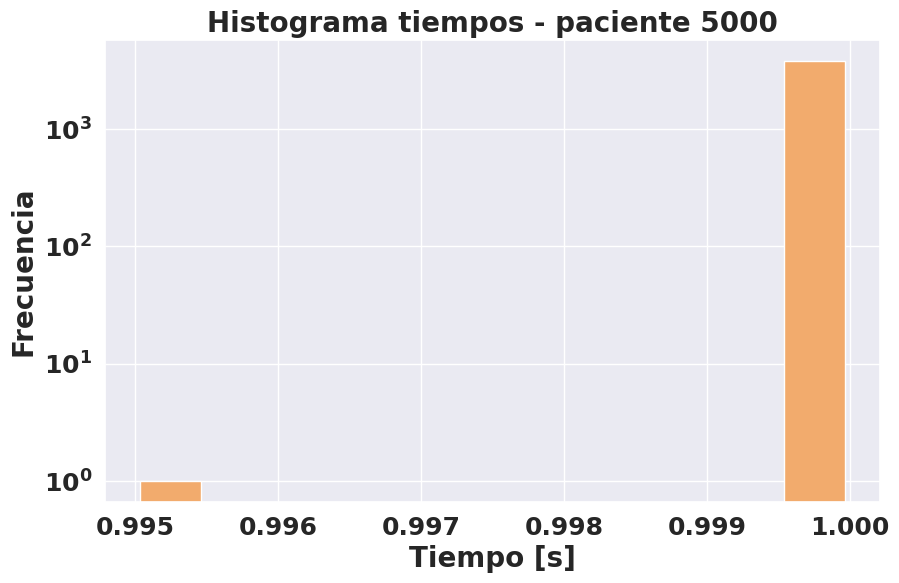

In [ ]:
plt.hist(((bis_1709['Time']).diff()), color='#F2AB6D', rwidth=0.85)
plt.xlabel("Tiempo [s]",fontsize=20,fontweight='bold')
plt.ylabel("Frecuencia",fontsize=20,fontweight='bold')
plt.title(f"Histograma tiempos - paciente {id}",fontsize=20,fontweight='bold')
plt.tick_params(axis='both', which='major', labelsize=18, width=2, length=6, direction="out")
plt.xticks(fontweight='bold')  # Establecer la negrita para los nÃºmeros en el eje x
plt.yticks(fontweight='bold')
#plt.xlim(0,)
plt.yscale('log')
plt.show()


In [ ]:
(bis_1709['Time']).tolist()
(bis_1709['BIS/BIS']).tolist()

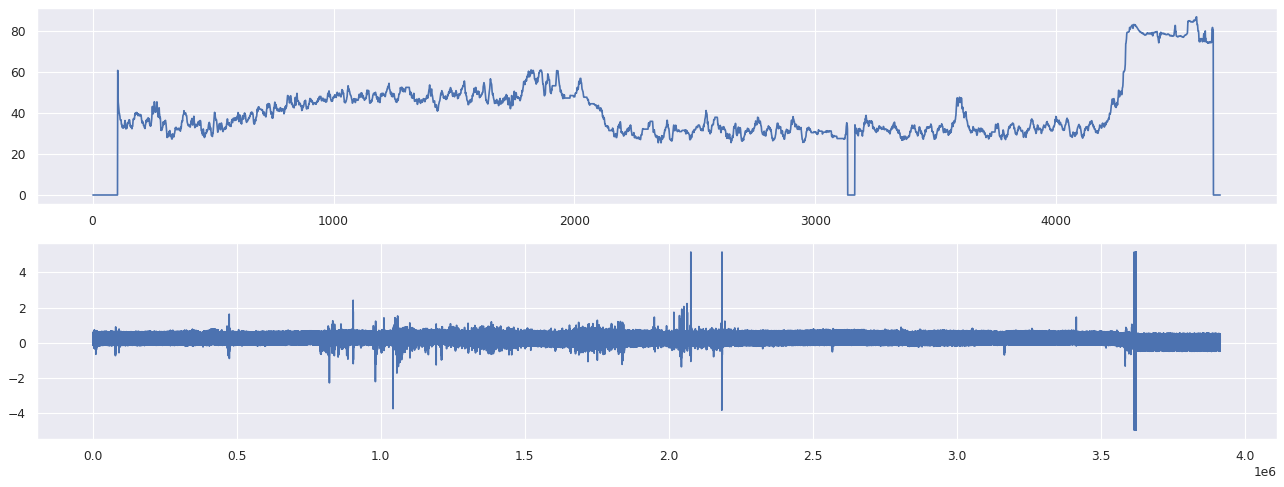

In [ ]:
plt.figure(figsize=(20,7),dpi=80)
plt.subplot(2,1,1)
plt.plot(bis_1709.Time,bis_1709['BIS/BIS'])
plt.subplot(2,1,2)
plt.plot(df['ECG'][3])

verificando los tiempos

In [ ]:
h_ecg=(((len(df['ECG'][3]))*0.002)/60)/60
h_bis=((bis_1709['Time'].iloc[-1])/60)/60

print(f'Tiempo de la señal BIS: {round(h_ecg,2)} horas')
print(f'Tiempo de la señal ECG: {round(h_bis,2)} horas')

Tiempo de la señal BIS: 2.17 horas
Tiempo de la señal ECG: 3.52 horas


In [ ]:
((bis_1709['Time']).diff()).value_counts()
import seaborn as sns
sns.set(rc={'figure.figsize':(10,6)})
ax = sns.distplot((bis_1709['Time']).diff(), kde=False)
ax.set(yscale="log")
ax.set(ylabel=f"Numero de observaciones pac_{id}")

,count
Time,
1.00,12275
1.00,1
1.00,1
1.01,1


Viendo la distribucion de los tiempos

Interpolando, interpolacion lineal

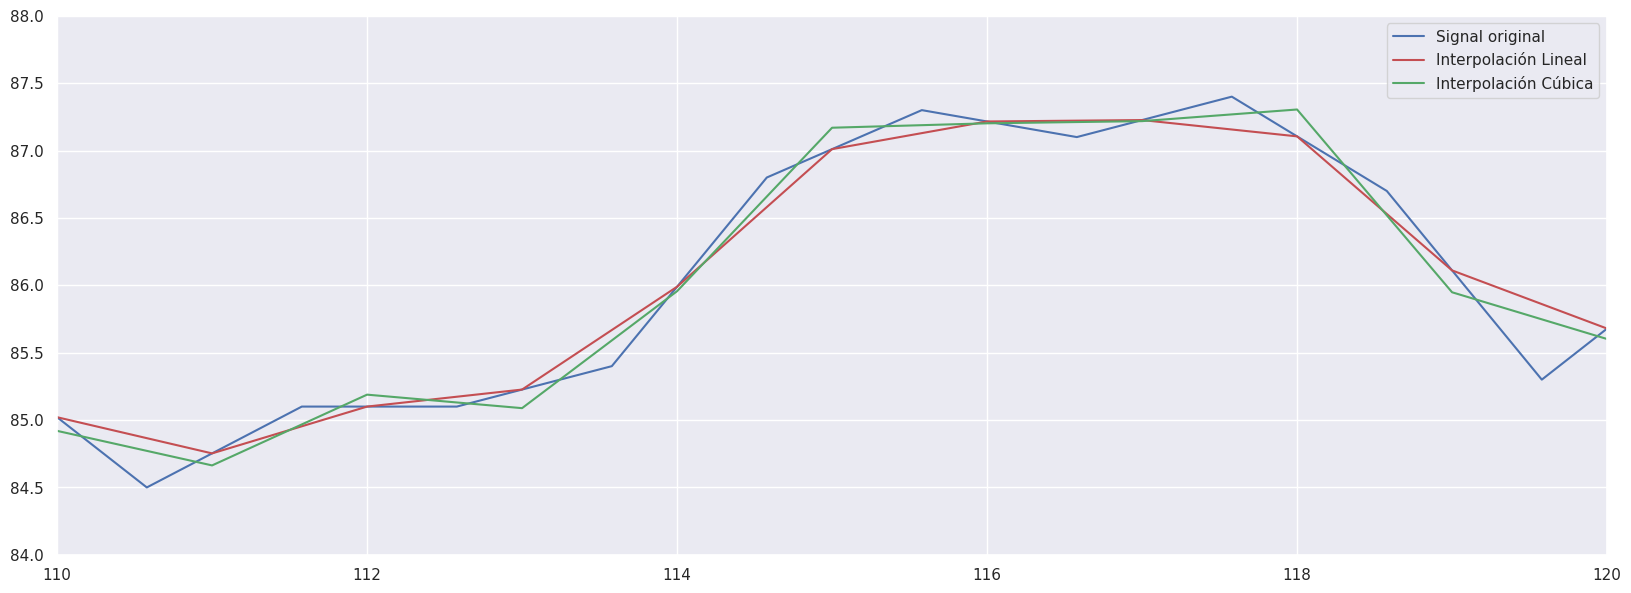

In [ ]:
from scipy import interpolate
import numpy as np

flinear = interpolate.interp1d(bis_1709['Time'], bis_1709['BIS/BIS'])
fcubic = interpolate.interp1d(bis_1709['Time'], bis_1709['BIS/BIS'], kind='cubic')   # correlacion cercana a 1

xnew = np.arange(1, len(bis_1709['BIS/BIS']), 1)
ylinear = flinear(xnew)
ycubic = fcubic(xnew)
plt.figure(figsize=(20, 7))
plt.plot(bis_1709['Time'], bis_1709['BIS/BIS'], '-b',label='Signal original')
plt.plot(xnew, ylinear, '-r',label='Interpolación Lineal')
plt.plot(xnew, ycubic, '-g',label='Interpolación Cúbica')
plt.legend(loc="upper right")
#plt.xlim([110,120])
plt.ylim([84,88])
plt.show()


tal vez se deba hacer la interpolación usando ventana móvil? que metodo usar para ver cual es la mejor interpolación, R-square 8variabilidad de los datos)

In [ ]:
bis_1709_=bis_1709.copy()
bis_1709_['Time'] = pd.to_datetime(bis_1709_['Time'])
bis_1709_.set_index('Time', inplace=True)

In [ ]:
bis_1709_

In [ ]:
df_interpolated = bis_1709_.interpolate(method='linear')

In [ ]:
df_interpolated

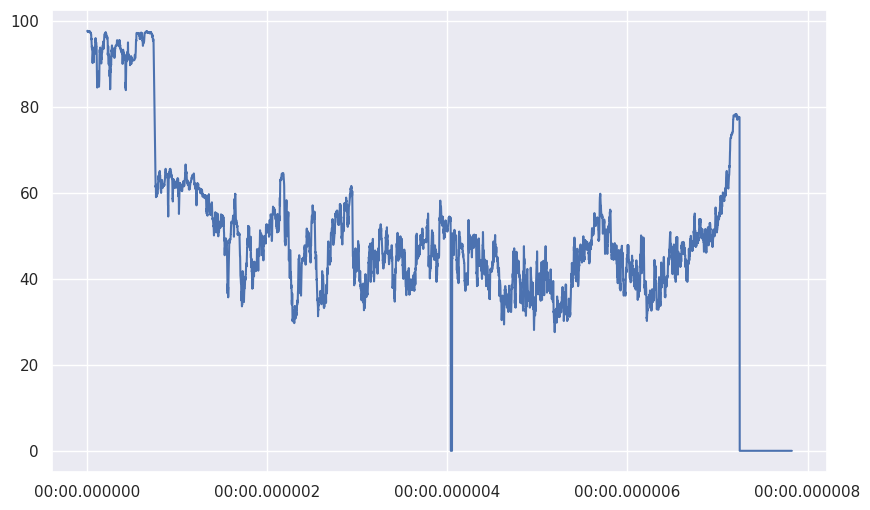

In [ ]:
plt.plot(df_interpolated)  mm

###preprocesamiento funciones

In [ ]:
import pywt
import pywt.data
import math
from sklearn.metrics import mean_squared_error

In [ ]:

# Despues de saber la wavelet y el nivel adecuado, se utiliza esta funcion para aplicarlo a la señal y ver la grafica
def denoise_ecg_signal(ecgg,wavelet_type, nivel,ecg_35_t):
    ecg=ecgg
    index = []
    data = []
    for i in range (len(ecg)):
        X = float(i)
        Y = float(ecg[i])
        index.append(X)
        data.append(Y)
    w = pywt.Wavelet(wavelet_type)
   # maxlev = pywt.dwt_max_level(len(data), w.dec_len)  # Maximo nivel usado para la descomposición
    maxlev=nivel
    coeffs = pywt.wavedec(data, wavelet_type, level=maxlev) # Descomposición wavelet de la señal con los coeficientes
    #print(pywt.dwt_max_level(len(data)))


    for i in range(1, len(coeffs)):
      M = len(coeffs[i])
      lambda_val = math.sqrt(2*math.log(M)) # Umbral para filtrar, Metodo SureShrink
      coeffs[i] = pywt.threshold(coeffs[i], lambda_val, 'soft') # Filtar el ruido una desicion de filtro 'soft'
    datarec = pywt.waverec(coeffs, wavelet_type) # Reconstruccion wavelet de la señal

    # Grafica la señal original y la filtrada de manera que esten superpuestas
    RMSE = round(math.sqrt(mean_squared_error(data, datarec)), 4)
    orig_sum_square = sum(i*i for i in data)
    pred_mins_orig = sum((y-x)**2 for x,y in zip(datarec, data))
    SNR=10*math.log10(orig_sum_square/pred_mins_orig)
    SNR = round(SNR, 4)
    return datarec,maxlev



3


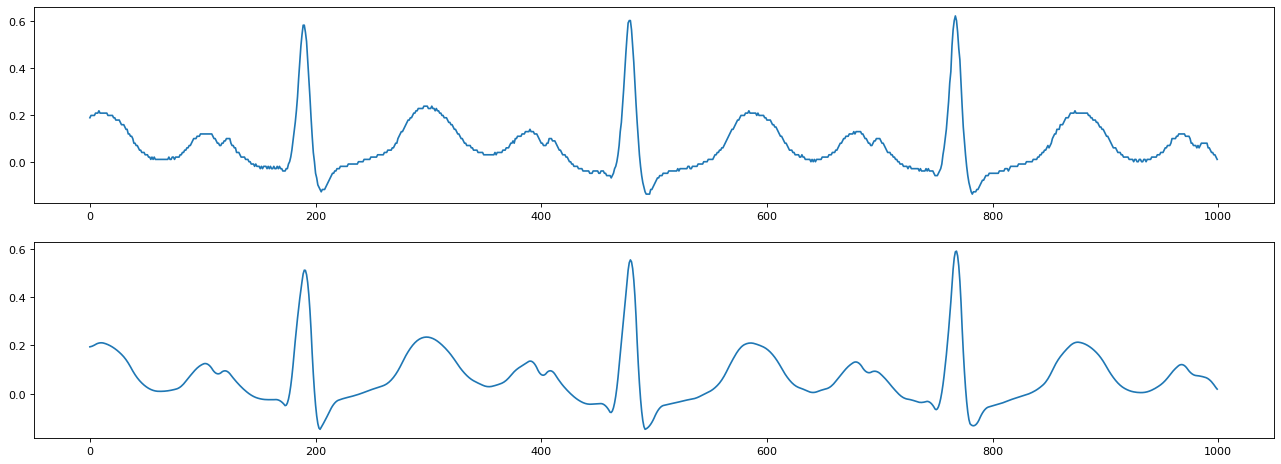

In [ ]:
datarec,l=denoise_ecg_signal(ecg_filled.ecg_1709,'bior3.5', 3,ecg_filled.tiempo)
plt.figure(figsize=(20,7),dpi=80)
plt.subplot(2,1,1)
plt.plot(ecg_filled.ecg_1709[0:1000])
plt.subplot(2,1,2)
plt.plot(datarec[0:1000])
print(l)

In [ ]:

def centrar(cgg,Fs,tiempo_ventana):
  ecg=cgg
  Fs = int(Fs)
  tiempo_ventana = int(tiempo_ventana)
  tiempo = tiempo_ventana
  muestras = Fs*tiempo_ventana
  num_vent = int(len(ecg)/muestras)
  signal_correction = np.zeros(len(ecg)) # creo una matriz de ceros

  for i in range(num_vent):
    if i==(num_vent-1) and (num_vent*muestras)<=len(ecg):
      x = ecg[muestras*(i):(len(ecg))]
      x = x - np.mean(x)
      signal_correction[muestras*(i):(len(ecg))] = x
    else:
      x = ecg[muestras*i:(muestras*i)+(muestras-1)]
      x = x - np.mean(x)
      signal_correction[muestras*i:(muestras*i)+(muestras-1)] = x
  return signal_correction

In [ ]:
signal_correction=centrar(datarec,500,200)
len(signal_correction)


700000

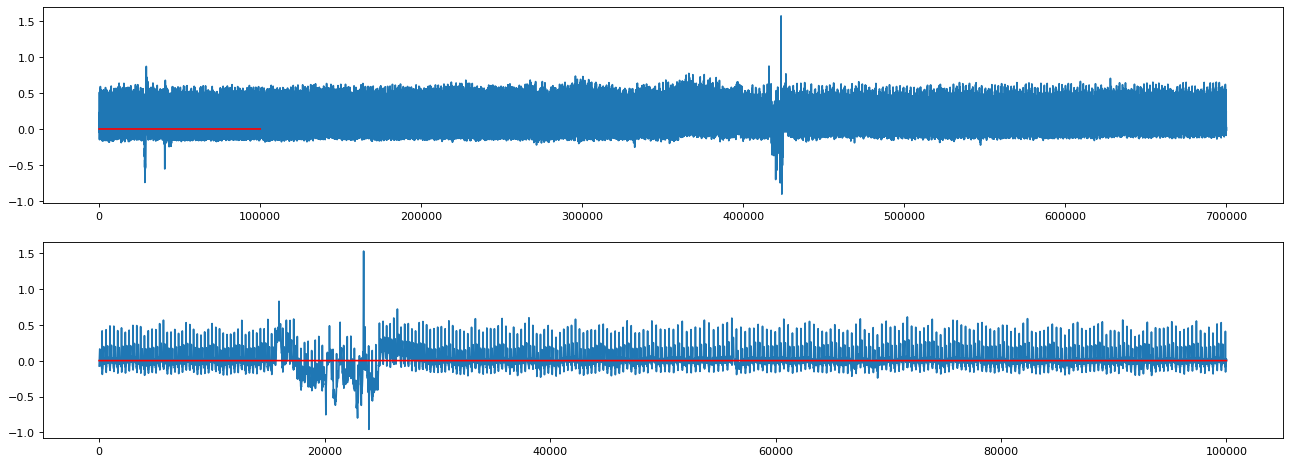

In [ ]:
plt.figure(figsize=(20,7),dpi=80)
plt.subplot(2,1,1)
plt.plot(datarec)
b=len(signal_correction)
b=np.zeros(b)
plt.plot(b[400000:500000],color='r')
plt.subplot(2,1,2)
plt.plot(signal_correction[400000:500000])
plt.plot(b[400000:500000],color='r')


In [ ]:
from scipy import signal
from scipy.signal import firwin, lfilter
def low_pass_filter(cg, cutoff):
    [a,b] = signal.butter(4,cutoff/100,'high');
    filtered_signal= signal.filtfilt(a,b,cg)
    return filtered_signal

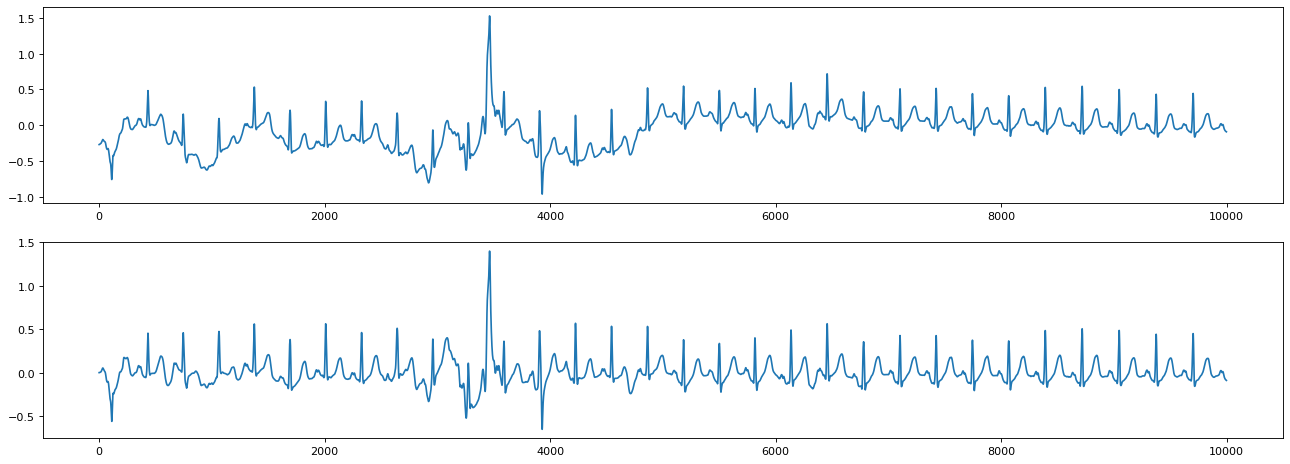

In [ ]:
data_sin_bs=low_pass_filter(signal_correction,0.25)
plt.figure(figsize=(20,7),dpi=80)
plt.subplot(2,1,1)
plt.plot(signal_correction[420000:430000])
plt.subplot(2,1,2)
plt.plot(data_sin_bs[420000:430000])


In [ ]:
def detect_peaks(ecg_signal, threshold, qrs_filter=None):
    '''
    Peak detection algorithm using cross corrrelation and threshold
    '''
    if qrs_filter is None:
        # create default qrs filter, which is just a part of the sine function
        t = np.linspace(1.5 * np.pi, 3.5 * np.pi,15)
        qrs_filter = np.sin(t)
    # normalize data
    ecg_signal = (ecg_signal - ecg_signal.mean()) / ecg_signal.std()
    # calculate cross correlation
    similarity = np.correlate(ecg_signal, qrs_filter, mode="same")
    similarity = similarity / np.max(similarity)
    ecg_signal=pd.DataFrame(ecg_signal)
    # return peaks (values in ms) using threshold
    return ecg_signal[similarity > threshold].index, similarity

In [ ]:
a=pd.DataFrame(data_sin_bs)
peak,similarity=detect_peaks(data_sin_bs,0.3)
similarity

array([-0.02353543,  0.01495776,  0.04417889, ..., -0.01031716,
        0.00528358,  0.02532213])

In [ ]:
peak
k=(ecg_filled.tiempo[peak]).tolist()
k

(-0.4, 0.55)

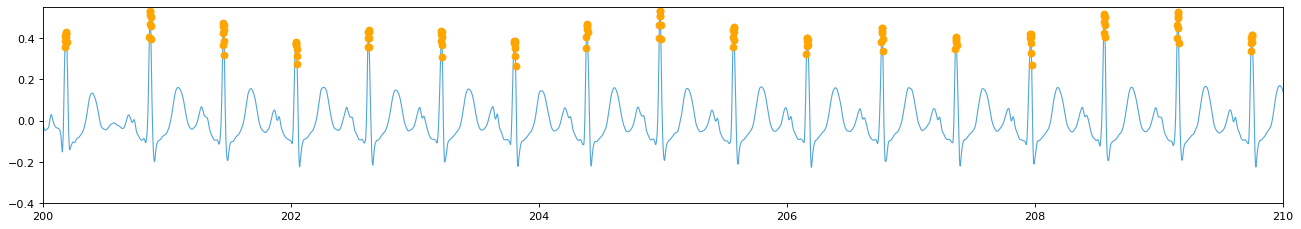

In [ ]:
plt.figure(figsize=(20,7),dpi=80)
plt.subplot(2,1,1)
plt.plot(ecg_filled.tiempo,data_sin_bs,label="ECG", color="#51A6D8", linewidth=1)
plt.plot(ecg_filled.tiempo[peak],data_sin_bs[peak],label="peaks", color="orange", marker="o", linestyle="None")
plt.xlim([200,210])
plt.ylim([-0.4,0.55])


Corrigiendo multiples picos

In [ ]:
from scipy.ndimage import label
def group_peaks(p, threshold=0.1):
    '''
    The peak detection algorithm finds multiple peaks for each QRS complex.
    Here we group collections of peaks that are very near (within threshold) and we take the median index
    '''
    # initialize output
    output = np.empty(0)
    p = np.array(p)

    # label groups of sample that belong to the same peak
    peak_groups, num_groups = label(np.diff(p) < threshold)

    # iterate through groups and take the mean as peak index
    print(peak_groups)
    print(num_groups)
    print(len(peak_groups))

    for i in range(1,num_groups+1,1):
        peak_group = p[np.where(peak_groups == i)]
        output = np.append(output, np.median(peak_group))

    return output

In [ ]:
grouped_peaks = group_peaks(k)
grouped_peaks

[   1    1    1 ... 2152 2152 2152]
2152
15059


array([ 100.383,  100.959,  101.535, ..., 1497.935, 1498.687, 1499.439])

(940.0, 960.0)

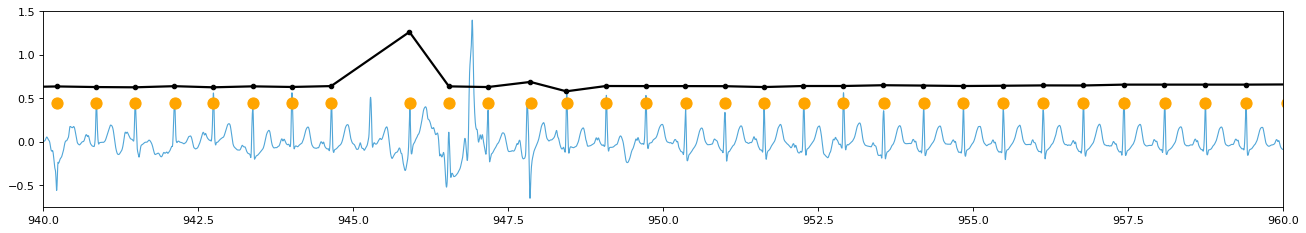

In [ ]:
plt.figure(figsize=(20,7),dpi=80)
plt.subplot(2,1,1)
plt.plot(ecg_filled.tiempo,data_sin_bs,label="ECG", color="#51A6D8", linewidth=1)
plt.plot(grouped_peaks, np.repeat(0.45, grouped_peaks.shape[0]), markersize=10, label="Found peaks", color="orange", marker="o", linestyle="None")
plt.plot(np.cumsum(np.diff(grouped_peaks))+k[0], np.diff(grouped_peaks), label="RR-intervals", color="k", linewidth=2, marker=".", markersize=8)

#plt.scatter(grouped_peaks,label="peaks", color="orange", marker="o", linestyle="None")
plt.xlim([940,960])
#plt.ylim([-0.4,0.55])

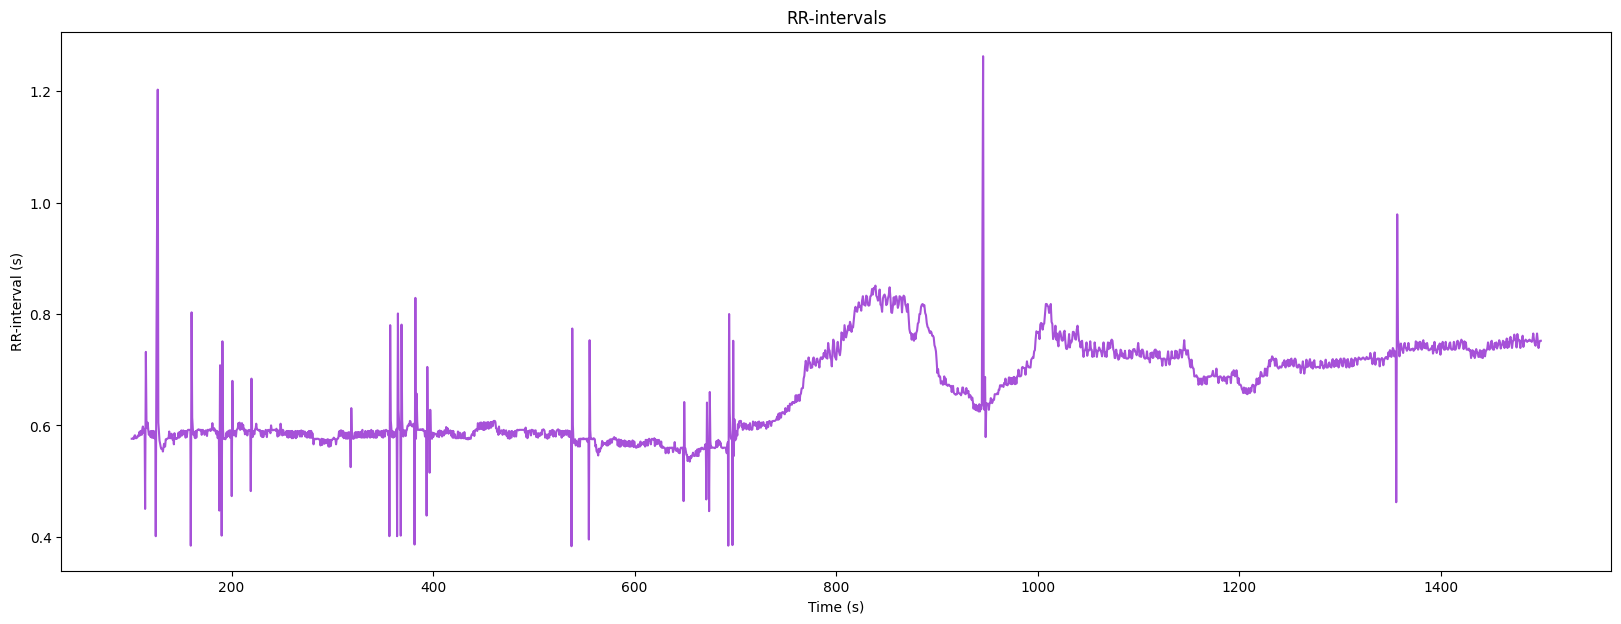

In [ ]:
# RR-intervals are the differences between successive peaks
rr = np.diff(grouped_peaks)

# plot RR-intervals
plt.figure(figsize=(20, 7))
plt.title("RR-intervals")
plt.xlabel("Time (s)")
plt.ylabel("RR-interval (s)")
#plt.xlim([940,1000])
plt.plot(np.cumsum(rr)+k[0], rr, label="RR-interval", color="#A651D8")
plt.show()

In [ ]:
!git clone https://github.com/rhenanbartels/hrv.git

Cloning into 'hrv'...
remote: Enumerating objects: 1545, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 1545 (delta 27), reused 41 (delta 18), pack-reused 1491
Receiving objects: 100% (1545/1545), 2.55 MiB | 9.51 MiB/s, done.
Resolving deltas: 100% (1028/1028), done.


In [ ]:
%cd "/content/drive/My Drive/Colab Notebooks/PD/hrv"
!python setup.py install

In [ ]:

from hrv.filters import threshold_filter,quotient,moving_median

Custom TB Handler failed, unregistering


In [ ]:
hrv.fil

In [ ]:
type(rr)

numpy.ndarray

**Correccion de picos**

In [ ]:
from scipy.stats import zscore
def corregir(rr_signal,muestras):
  rrr=rr_signal
  rr_corrected=[]
  num_vent = int(len(rrr)/muestras)

  for i in range(num_vent):
    if i==(num_vent-1) and (num_vent*muestras)<=len(rrr):
      x = rrr[muestras*(i):(len(rrr))]
      promedio = np.mean(x)
     # signal_correction[muestras*(i):(len(ecg))] = x
    else:
      x = rrr[muestras*i:(muestras*i)+(muestras)]
      promedio = np.mean(x)
      #signal_correction[muestras*i:(muestras*i)+(muestras-1)] = x

    rr_correcte = x.copy()
    rr_correcte[np.abs(zscore(x)) > 2] = promedio

    if i>=1:
      rr_corrected=np.concatenate((rr_corrected,rr_correcte))
    elif i==0:
      rr_corrected=rr_correcte



  return rr_corrected

In [ ]:
rr_corrected=corregir(rr,100)
len(rr_corrected)

2151

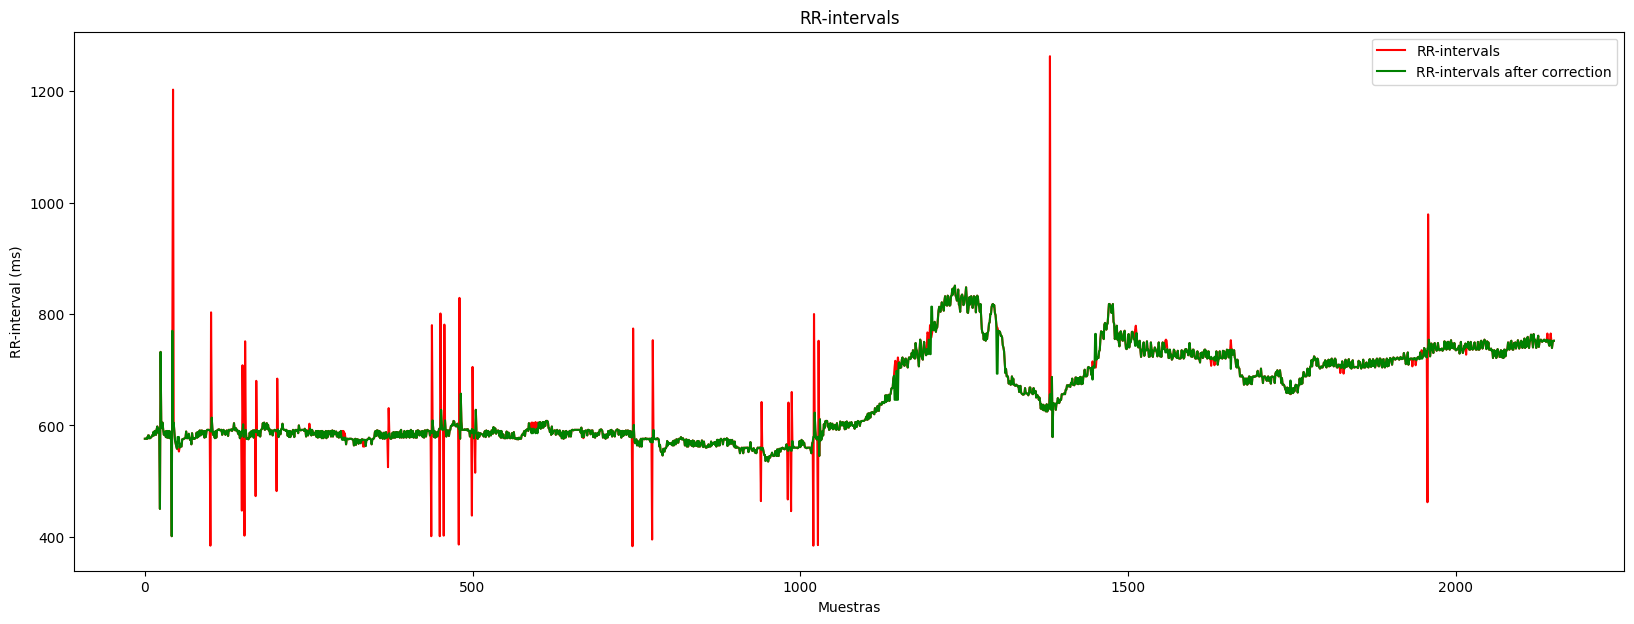

In [ ]:
plt.figure(figsize=(20, 7))
plt.title("RR-intervals")
plt.xlabel("Muestras")
plt.ylabel("RR-interval (ms)")

rr_corrected=corregir(rr,50)
plt.plot(rr*1000, color="red", label="RR-intervals")
plt.plot(rr_corrected*1000, color="green",  label="RR-intervals after correction")
plt.legend()
#plt.xlim([0,500])
plt.show()

####probando

(110.0, 120.0)

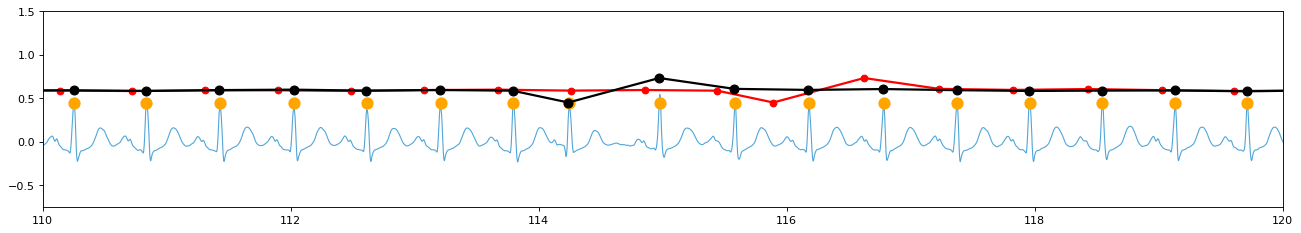

In [ ]:
plt.figure(figsize=(20,7),dpi=80)
plt.subplot(2,1,1)
plt.plot(ecg_filled.tiempo,data_sin_bs,label="ECG", color="#51A6D8", linewidth=1)
plt.plot(grouped_peaks, np.repeat(0.45, grouped_peaks.shape[0]), markersize=10, label="Found peaks", color="orange", marker="o", linestyle="None")
plt.plot(np.cumsum(rr_corrected)+102.03, rr_corrected, label="RR-intervals", color="r",marker='o', linewidth=2)
plt.plot(np.cumsum(np.diff(grouped_peaks))+k[0], np.diff(grouped_peaks), label="RR-intervals", color="k", linewidth=2, marker="o", markersize=8)

#plt.scatter(grouped_peaks,label="peaks", color="orange", marker="o", linestyle="None")
plt.xlim([110,120])
#plt.ylim([-0.4,0.55])

Correcion de picos R

####Otro codigo para correccion

* Hacer el código de Ennio
* Entender el código y probar los dempas algortimos para ver cual es el mejor en la detección de picos R
* Revisar el preprocesamiento de la señal para ver si sale mejor el HRV
* Remuestrear a 4 Hz el HRV
* Mirar lo de la señal BIS para interpolar los tiempos (Es una pregunta para Ennio)
*sacar las preguntas para Ennio, tener listo todos los códigos para mostrar avances

In [ ]:
!pip install hrv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.8/230.8 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for spectrum: filename=spectrum-0.8.1-cp310-cp310-linux_x86_64.whl size=236591 sha256=df1678d0146fab2817092f751eb526840f4bbae43e3cbe76bb38d17eae8fbd60
  Stored in directory: /root/.cache/pip/wheels/e7/5a/09/ffc6afdf8a5a6f58e9851292108df32bb11374e11b8705cabd
  Created wheel for easydev: filename=easydev-0.12.1-py3-none-any.whl size=64213 sha256=3556f3e3dd0a6d6ddb638816a5ef106cbc26e3473261e86b3a352ac6715ed857
  Stored in directory: /root/.cache/pip/wheels/c5/a3/df/e8e19f6f1674c2b0574ccc1a156292b599709eaa4feeea0fcf
Successfully built spectrum easydev
